In [1]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble, utils
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


patient = pd.read_csv('haberman.csv')
patient.columns = ['age', 'year_of_surgery', 'axil_nodes', 'surv_status']
patient['surv_status'] = patient['surv_status'].map({1:1, 2:0})
patient.head(30)

,age,year_of_surgery,axil_nodes,surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,0
7,34,66,9,0
8,34,58,30,1
9,34,60,1,1


In [2]:
print(patient.describe())
print(patient.info())
print(patient.isnull().values.any())

              age  year_of_surgery  axil_nodes  surv_status
count  305.000000       305.000000  305.000000   305.000000
mean    52.531148        62.849180    4.036066     0.734426
std     10.744024         3.254078    7.199370     0.442364
min     30.000000        58.000000    0.000000     0.000000
25%     44.000000        60.000000    0.000000     0.000000
50%     52.000000        63.000000    1.000000     1.000000
75%     61.000000        66.000000    4.000000     1.000000
max     83.000000        69.000000   52.000000     1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              305 non-null    int64
 1   year_of_surgery  305 non-null    int64
 2   axil_nodes       305 non-null    int64
 3   surv_status      305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None
False


<AxesSubplot:>

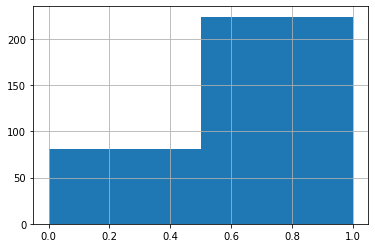

In [3]:
patient['surv_status'].hist(bins=2) 

<AxesSubplot:>

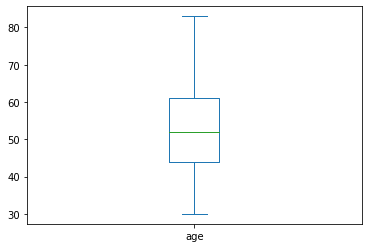

In [4]:
patient['age'].plot.box() 

<AxesSubplot:>

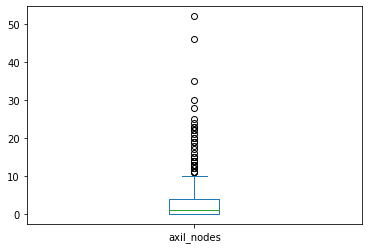

In [5]:
patient['axil_nodes'].plot.box() 

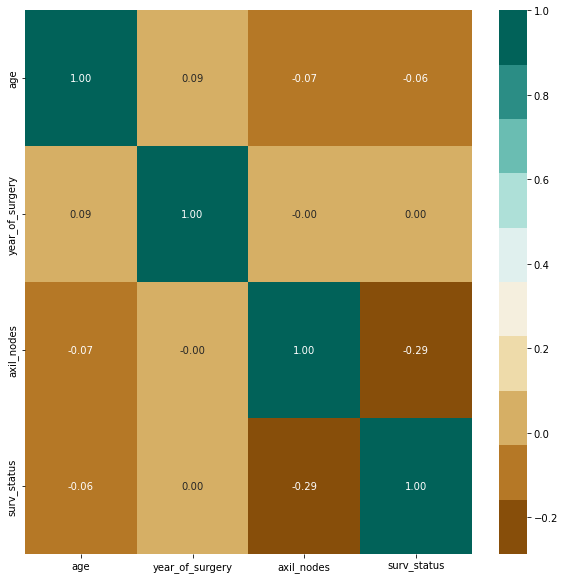

In [6]:
correlations = patient.corr()
fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")
ax.set_yticklabels(patient.columns);

plt.show()

In [7]:
X = patient.drop('surv_status', axis=1).to_numpy()
X

array([[30, 62,  3],
       [30, 65,  0],
       [31, 59,  2],
       [31, 65,  4],
       [33, 58, 10],
       [33, 60,  0],
       [34, 59,  0],
       [34, 66,  9],
       [34, 58, 30],
       [34, 60,  1],
       [34, 61, 10],
       [34, 67,  7],
       [34, 60,  0],
       [35, 64, 13],
       [35, 63,  0],
       [36, 60,  1],
       [36, 69,  0],
       [37, 60,  0],
       [37, 63,  0],
       [37, 58,  0],
       [37, 59,  6],
       [37, 60, 15],
       [37, 63,  0],
       [38, 69, 21],
       [38, 59,  2],
       [38, 60,  0],
       [38, 60,  0],
       [38, 62,  3],
       [38, 64,  1],
       [38, 66,  0],
       [38, 66, 11],
       [38, 60,  1],
       [38, 67,  5],
       [39, 66,  0],
       [39, 63,  0],
       [39, 67,  0],
       [39, 58,  0],
       [39, 59,  2],
       [39, 63,  4],
       [40, 58,  2],
       [40, 58,  0],
       [40, 65,  0],
       [41, 60, 23],
       [41, 64,  0],
       [41, 67,  0],
       [41, 58,  0],
       [41, 59,  8],
       [41, 5

In [8]:
y = patient.loc[:, 'surv_status'].to_numpy()
y

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345) 

In [10]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # trenuj model
    classifier.fit(feature_vector_train, label)
    
    # wygeneruj przewidywania modelu dla zbioru testowego
    predictions = classifier.predict(feature_vector_valid)
    
    # dokonaj ewaluacji modelu na podstawie danych testowych
    scores = list(metrics.precision_recall_fscore_support(predictions, y_test))
    score_vals = [
        scores[0][0],
        scores[1][0],
        scores[2][0]
    ]
    score_vals.append(metrics.accuracy_score(predictions, y_test))
    return score_vals

In [11]:
accuracy = train_model(linear_model.LogisticRegression(), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

LR:  [0.11538461538461539, 0.42857142857142855, 0.18181818181818182, 0.7065217391304348]


In [12]:
# MODEL 2 - Support Vector Machine
accuracy = train_model(svm.SVC(), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM" , accuracy)

SVM [0.0, 0.0, 0.0, 0.6739130434782609]


In [13]:
# MODEL 3 - Random Forest Tree 
accuracy = train_model(ensemble.RandomForestClassifier(), X_train, y_train, X_test)
accuracy_compare['RF'] = accuracy
print ("RF: ", accuracy)

RF:  [0.2692307692307692, 0.3888888888888889, 0.3181818181818182, 0.6739130434782609]


<AxesSubplot:>

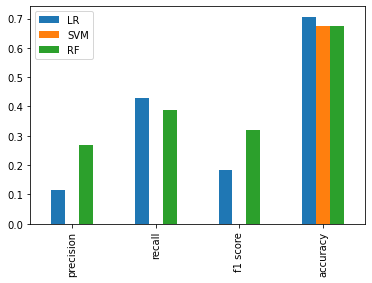

In [14]:
# porównanie modeli

df_compare = pd.DataFrame(accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy'])
df_compare.plot(kind='bar')

In [30]:
# działania korygujące - zastosowanie sieci neuronowej

# MODEL 4 - neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
accuracy = train_model(mlp, X_train, y_train, X_test)
accuracy_compare['neural network'] = accuracy
print ("neural network" , accuracy)

neural network [0.038461538461538464, 0.2, 0.06451612903225806, 0.6847826086956522]


In [31]:
# działania korygujące - hiperparametry

# MODEL 5 - Support Vector Machine
accuracy = train_model(svm.SVC(gamma='auto'), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM gamma='auto'" , accuracy)

# MODEL 6 - Support Vector Machine
accuracy = train_model(svm.SVC(kernel='sigmoid'), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM kernel='sigmoid'" , accuracy)

# MODEL 7 - Support Vector Machine
accuracy = train_model(svm.SVC(degree=4), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM degree=4" , accuracy)

SVM gamma='auto' [0.038461538461538464, 0.5, 0.07142857142857144, 0.717391304347826]
SVM kernel='sigmoid' [0.0, 0.0, 0.0, 0.717391304347826]
SVM degree=4 [0.0, 0.0, 0.0, 0.6739130434782609]


/Users/rkujawa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
import pickle
pickle.dump(mlp, open('model.pkl', 'wb'))

In [45]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1])

In [46]:
 Analiza wyników:
    Model zdecydowanie nie nadaje się do żadnych celów komercyjnych, może być traktowany wyłącznie jako ciekawostka.
    Jest bardzo nieprecyzyjny i niedokładny. Powodować to może źle rozłożona próba testowa, ale również zbyt mała ilość
    danych szkoleniowych. 
    

SyntaxError: invalid syntax (2763160640.py, line 1)